# **Linear Regression From Scratch**



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_csv=pd.read_csv('https://raw.githubusercontent.com/yoga-suhas-km/Intelligent_systems/main/marks_dataset.csv')

## Checking for null and NAN values in the dataset

In [ ]:
file_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Midterm mark  100 non-null    float64
 1   Final mark    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
file_csv.describe()

,Midterm mark,Final mark
count,100.000000,100.000000
mean,48.959000,72.735000
std,9.746495,16.658249
min,25.100000,31.700000
25%,41.550000,60.775000
50%,49.600000,72.150000
75%,56.750000,83.175000
max,70.300000,118.600000


In [ ]:
midterm_mean=file_csv['Midterm mark'].mean()
midterm_std=file_csv['Midterm mark'].std()
dataLength=file_csv['Midterm mark'].count()

final_mean=file_csv['Final mark'].mean()
final_std=file_csv['Final mark'].std()


In [ ]:
midterm_mark=file_csv['Midterm mark']
final_mark=file_csv['Final mark']

In [ ]:
midterm_mark

,Midterm mark
0,32.5
1,53.4
2,61.5
3,47.5
4,59.8
...,...
95,50.0
96,49.2
97,50.0
98,48.1


## Standardization



In [ ]:
std_input=[]
std_output=[]

for i in midterm_mark:
  std_input.append((i-midterm_mean)/midterm_std)
file_csv["standardized_midterm_mark"]=pd.DataFrame(std_input)

for i in final_mark:
  std_output.append((i-final_mean)/final_std)
file_csv["standardized_final_mark"]=pd.DataFrame(std_output)

In [ ]:
file_csv.head(10)

,Midterm mark,Final mark,standardized_midterm_mark,standardized_final_mark
0,32.5,31.7,-1.688710,-2.463344
1,53.4,68.8,0.455651,-0.236219
2,61.5,62.6,1.286719,-0.608407
3,47.5,71.5,-0.149695,-0.074137
4,59.8,87.2,1.112297,0.868339
5,55.1,78.2,0.630073,0.328066
6,52.2,79.6,0.332530,0.412108
7,39.3,59.2,-0.991023,-0.812510
8,48.1,75.3,-0.088134,0.153978
9,52.6,71.3,0.373570,-0.086144


## Initialization of m and b

In [ ]:
m=-0.5
b=0
alpha=0.0001

## Predicted Value of final mark with standardization

In [ ]:
final_mark_predicted=[]
for i in file_csv['standardized_midterm_mark']:
  final_mark_predicted.append(m*i+b)

file_csv['final_mark_predicted_std']=pd.DataFrame(final_mark_predicted)
file_csv.head(10)

,Midterm mark,Final mark,standardized_midterm_mark,standardized_final_mark,final_mark_predicted_std
0,32.5,31.7,-1.688710,-2.463344,0.844355
1,53.4,68.8,0.455651,-0.236219,-0.227825
2,61.5,62.6,1.286719,-0.608407,-0.643359
3,47.5,71.5,-0.149695,-0.074137,0.074847
4,59.8,87.2,1.112297,0.868339,-0.556149
5,55.1,78.2,0.630073,0.328066,-0.315036
6,52.2,79.6,0.332530,0.412108,-0.166265
7,39.3,59.2,-0.991023,-0.812510,0.495511
8,48.1,75.3,-0.088134,0.153978,0.044067
9,52.6,71.3,0.373570,-0.086144,-0.186785


# Predicted Value of final mark without standardization

In [ ]:
final_mark_predicted=[]
for i in file_csv['Midterm mark']:
  final_mark_predicted.append(m*i+b)

file_csv['final_mark_predicted']=pd.DataFrame(final_mark_predicted)
file_csv.head(10)

,Midterm mark,Final mark,standardized_midterm_mark,standardized_final_mark,final_mark_predicted_std,final_mark_predicted
0,32.5,31.7,-1.688710,-2.463344,0.844355,-16.25
1,53.4,68.8,0.455651,-0.236219,-0.227825,-26.70
2,61.5,62.6,1.286719,-0.608407,-0.643359,-30.75
3,47.5,71.5,-0.149695,-0.074137,0.074847,-23.75
4,59.8,87.2,1.112297,0.868339,-0.556149,-29.90
5,55.1,78.2,0.630073,0.328066,-0.315036,-27.55
6,52.2,79.6,0.332530,0.412108,-0.166265,-26.10
7,39.3,59.2,-0.991023,-0.812510,0.495511,-19.65
8,48.1,75.3,-0.088134,0.153978,0.044067,-24.05
9,52.6,71.3,0.373570,-0.086144,-0.186785,-26.30


## Cost Function

In [ ]:
def costFunction(y,y_predicted):
  Error=0
  for i in range(dataLength):
    Error+=(1/dataLength)*((y.iloc[i] - y_predicted.iloc[i])**2)
  return Error

## Plot of non standardized data

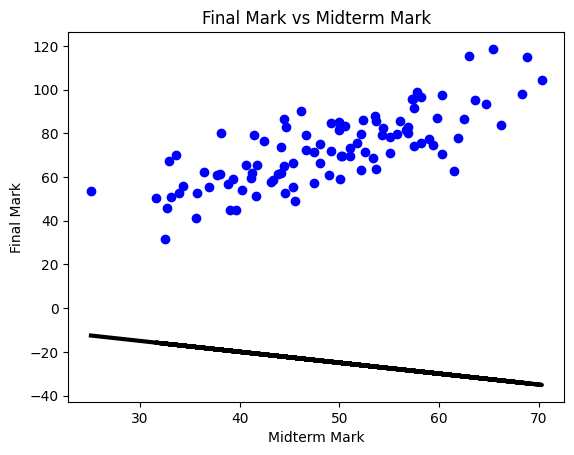

In [ ]:
import matplotlib.pyplot as plt

# Create the prediction space
prediction_space = np.linspace(min(file_csv['Midterm mark']), max(file_csv['Midterm mark'])).reshape(-1,1)
y= m*file_csv['Midterm mark']+b
# Plot
plt.scatter(file_csv['Midterm mark'], file_csv['Final mark'], color='blue')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.plot(file_csv['Midterm mark'], y, color='black', linewidth=3)
plt.title("Final Mark vs Midterm Mark")
plt.show()

## Plot of Standardized Data

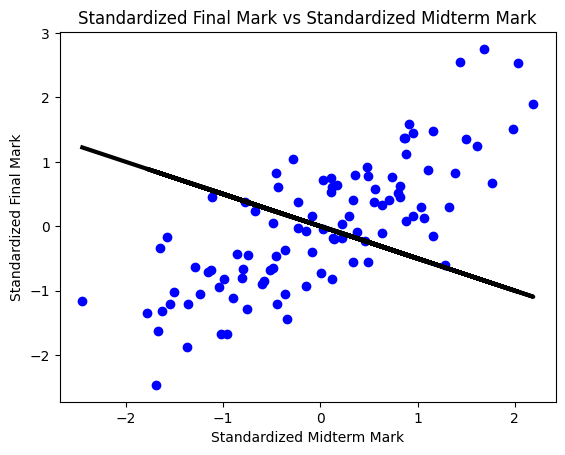

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['standardized_midterm_mark']), max(file_csv['standardized_midterm_mark'])).reshape(-1,1)

# Plot
plt.scatter(file_csv['standardized_midterm_mark'], file_csv['standardized_final_mark'], color='blue')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Standardized Final Mark')
plt.plot(file_csv['standardized_midterm_mark'], file_csv['final_mark_predicted_std'], color='black', linewidth=3)
plt.title("Standardized Final Mark vs Standardized Midterm Mark")
plt.show()

## Sample Gradient Partial Derivative

In [ ]:
gpd_m=0
gpd_b=0

for i in range(dataLength):
  gpd_m+=(2/dataLength)*((file_csv['Final mark'].iloc[i] - file_csv['final_mark_predicted'].iloc[i]) * (-1)*(file_csv['Midterm mark'].iloc[i]))
  gpd_b+=(2/dataLength)*((file_csv['Final mark'].iloc[i] - file_csv['final_mark_predicted'].iloc[i]) * (-1))

"gpd_m: " + str(gpd_m),"gpd_b: "+str(gpd_b)

('gpd_m: -9861.7451', 'gpd_b: -194.429')

## Sample Updating m and b

In [ ]:
m_new = m - (alpha * gpd_m)
b_new= b - (alpha * gpd_b)

m_new, b_new

(0.48617451, 0.019442900000000003)

## Creating the function to update m and b respectively

In [ ]:
def update_weights(m_old, b_old, y, y_std, x):

  final_mark_predicted=[]
  for i in x:
    final_mark_predicted.append(m_old*i+b_old)

  file_csv['final_mark_predicted'+y_std]=pd.DataFrame(final_mark_predicted)
  gpd_m=0
  gpd_b=0

  #Applying Gradient Partial Derivative
  for i in range(dataLength):
    gpd_m+=(2/dataLength)*((y.iloc[i] - file_csv['final_mark_predicted'+y_std].iloc[i]) * (-1)*(x.iloc[i]))
    gpd_b+=(2/dataLength)*((y.iloc[i] - file_csv['final_mark_predicted'+y_std].iloc[i]) * (-1))

  #Updating m and b parameters/weights
  m_new = m_old - (alpha * gpd_m)
  b_new = b_old - (alpha * gpd_b)
  return m_new, b_new

## Updating the Parameters for 100 Iterations

## Non-Standardized Data

In [ ]:
m_old=m
b_old=b
lossFunction=[]
for i in range(100):
  m_new,b_new= update_weights(m_old, b_old,file_csv['Final mark'],"",file_csv['Midterm mark'])
  m_old=m_new
  b_old=b_new
  lossFunction.append(costFunction(file_csv['Final mark'],file_csv['final_mark_predicted']))
m_new,b_new

(1.478572756014391, 0.044905363972887136)

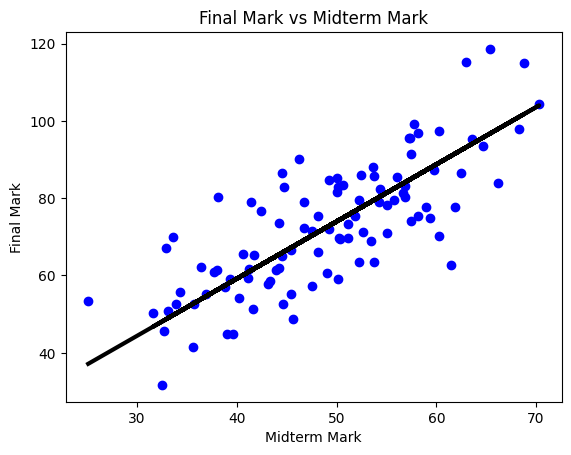

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['Midterm mark']), max(file_csv['Midterm mark'])).reshape(-1,1)
y= m_new*file_csv['Midterm mark']+b_new
# Plot
plt.scatter(file_csv['Midterm mark'], file_csv['Final mark'], color='blue')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.plot(file_csv['Midterm mark'], y, color='black', linewidth=3)
plt.title("Final Mark vs Midterm Mark")
plt.show()

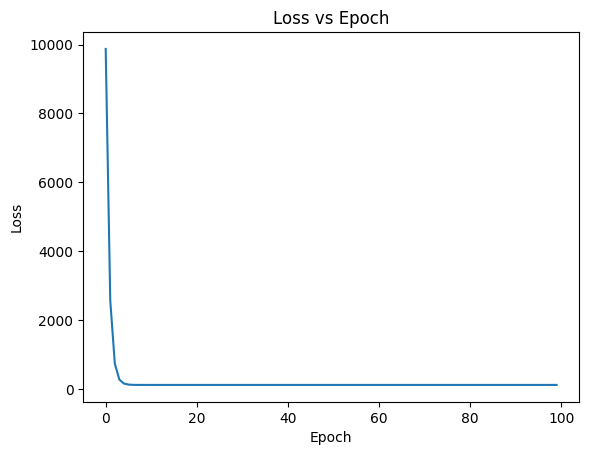

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(100), lossFunction)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

## Standardized Data

In [ ]:
m_old=m
b_old=b
lossFunction_std=[]
for i in range(100):
  m_new_std,b_new_std= update_weights(m_old, b_old,file_csv['standardized_final_mark'],"_std",file_csv['standardized_midterm_mark'])
  m_old=m_new_std
  b_old=b_new_std
  lossFunction_std.append(costFunction(file_csv['standardized_final_mark'],file_csv['final_mark_predicted_std']))
m_new_std,b_new_std

(-0.475030672874282, -2.4792667918660543e-18)

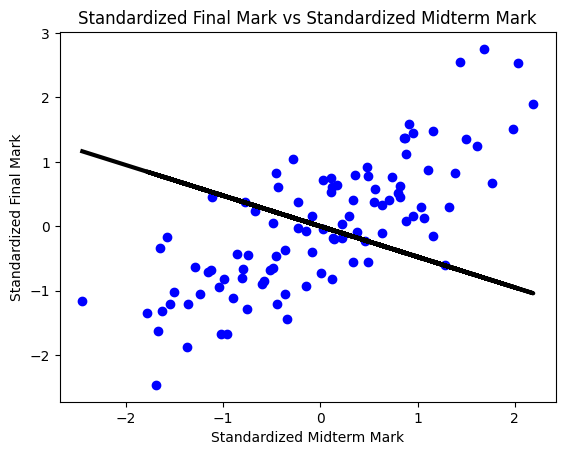

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['standardized_midterm_mark']), max(file_csv['standardized_midterm_mark'])).reshape(-1,1)

# Plot
plt.scatter(file_csv['standardized_midterm_mark'], file_csv['standardized_final_mark'], color='blue')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Standardized Final Mark')
plt.plot(file_csv['standardized_midterm_mark'], file_csv['final_mark_predicted_std'], color='black', linewidth=3)
plt.title("Standardized Final Mark vs Standardized Midterm Mark")
plt.show()

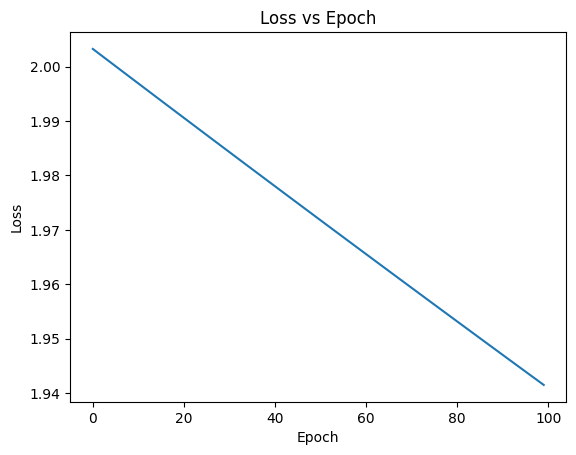

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(100), lossFunction_std, label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

# Updating the parameters for 2000 iterations

## Non-Standardized Data

In [ ]:
m_old=m
b_old=b
lossFunction=[]
for i in range(2000):
  m_new,b_new= update_weights(m_old, b_old,file_csv['Final mark'],"",file_csv['Midterm mark'])
  m_old=m_new
  b_old=b_new
  lossFunction.append(costFunction(file_csv['Final mark'],file_csv['final_mark_predicted']))
m_new,b_new

(1.4763433036607632, 0.158337907084427)

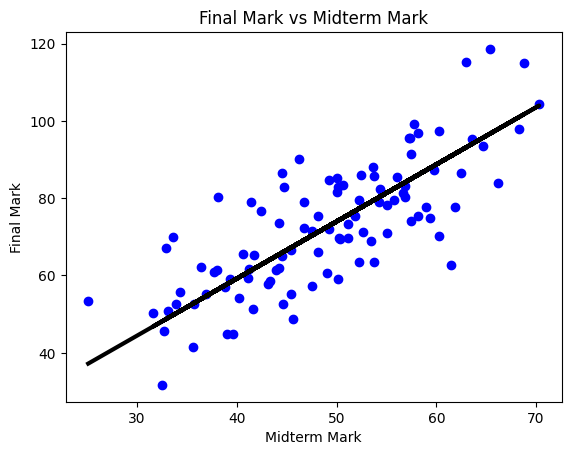

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['Midterm mark']), max(file_csv['Midterm mark'])).reshape(-1,1)
y= m_new*file_csv['Midterm mark']+b_new
# Plot
plt.scatter(file_csv['Midterm mark'], file_csv['Final mark'], color='blue')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.plot(file_csv['Midterm mark'], y, color='black', linewidth=3)
plt.title("Final Mark vs Midterm Mark")
plt.show()

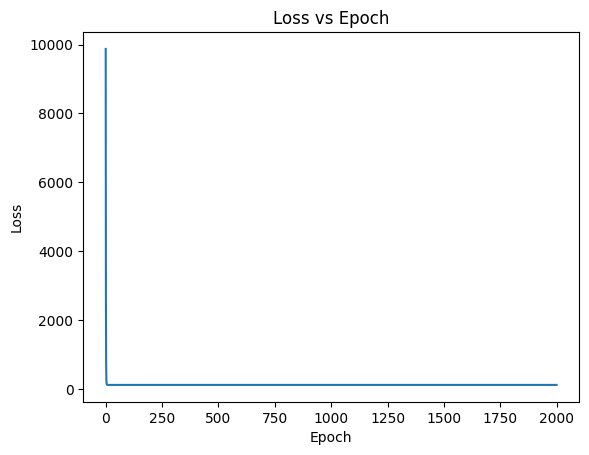

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(2000), lossFunction)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

## Standardized Data

In [ ]:
m_old=m
b_old=b
lossFunction_std=[]
for i in range(2000):
  m_new_std,b_new_std= update_weights(m_old, b_old,file_csv['standardized_final_mark'],'_std',file_csv['standardized_midterm_mark'])
  m_old=m_new_std
  b_old=b_new_std
  lossFunction_std.append(costFunction(file_csv['standardized_final_mark'],file_csv['final_mark_predicted_std']))
m_new_std,b_new_std

(-0.08354757025254304, -2.242060703760978e-17)

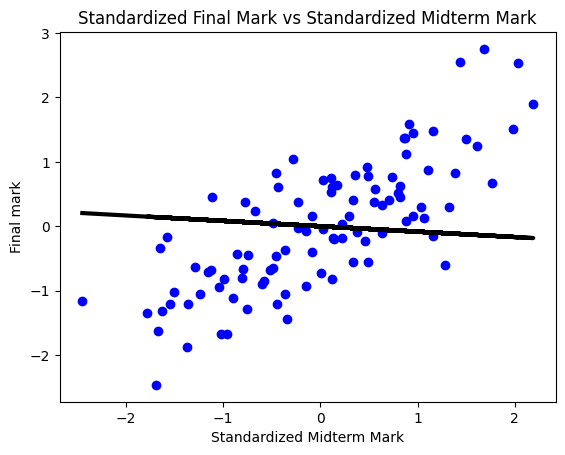

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['standardized_midterm_mark']), max(file_csv['standardized_midterm_mark'])).reshape(-1,1)

# Plot
plt.scatter(file_csv['standardized_midterm_mark'], file_csv['standardized_final_mark'], color='blue')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Final mark')
plt.plot(file_csv['standardized_midterm_mark'], file_csv['final_mark_predicted_std'], color='black', linewidth=3)
plt.title("Standardized Final Mark vs Standardized Midterm Mark")
plt.show()

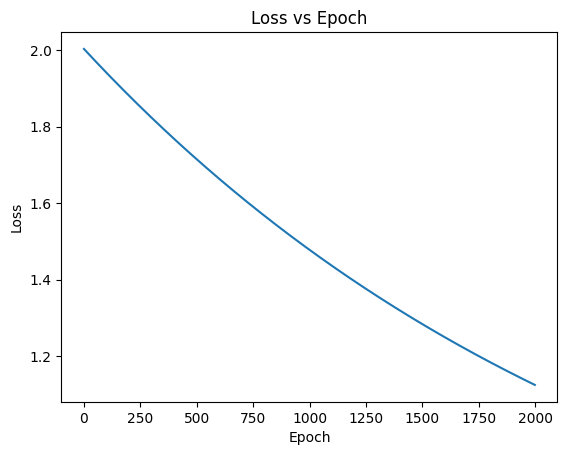

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(2000), lossFunction_std, label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

# Utilizing Scikit Learn LinearRegression()

## Non Standardized

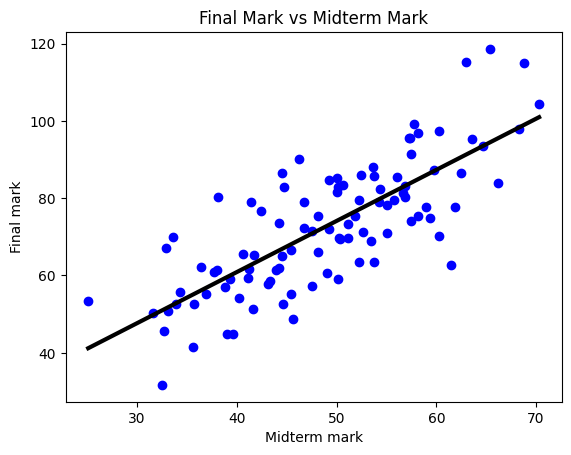

Model Score: 0.5982684385776686
Model Coefficient (m) [[1.32199232]]
Model Intercept (b) [8.01157814]


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape the input to be 2-dimensional
X = file_csv['Midterm mark'].values.reshape(-1, 1)
y = file_csv['Final mark'].values.reshape(-1,1)

# Fit the model
reg = LinearRegression().fit(X, y)

# Predict
prediction_space = np.linspace(min(file_csv['Midterm mark']), max(file_csv['Midterm mark'])).reshape(-1, 1)
predictions = reg.predict(prediction_space)

# Plot (if needed)
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(prediction_space, predictions, color='black', linewidth=3)
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title("Final Mark vs Midterm Mark")
plt.show()

print("Model Score:", reg.score(X, y))
print("Model Coefficient (m)", reg.coef_)
print("Model Intercept (b)", reg.intercept_)


## Standardized

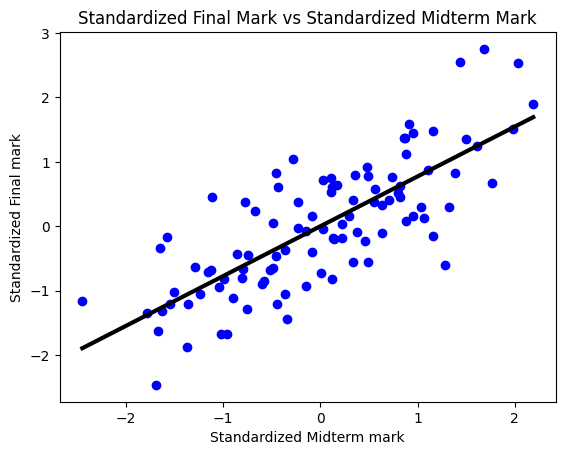

Model Score: 0.5982684385776688
Model Coefficient (m) [[0.77347814]]
Model Intercept (b) [1.9759457e-16]


In [ ]:
# Reshape the input to be 2-dimensional
X = file_csv['standardized_midterm_mark'].values.reshape(-1, 1)
y = file_csv['standardized_final_mark'].values.reshape(-1,1)

# Fit the model
reg = LinearRegression().fit(X, y)

# Predict
prediction_space = np.linspace(min(file_csv['standardized_midterm_mark']), max(file_csv['standardized_midterm_mark'])).reshape(-1, 1)
predictions = reg.predict(prediction_space)

# Plot (if needed)
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(prediction_space, predictions, color='black', linewidth=3)
plt.xlabel('Standardized Midterm mark')
plt.ylabel('Standardized Final mark')
plt.title("Standardized Final Mark vs Standardized Midterm Mark")
plt.show()

print("Model Score:", reg.score(X, y))
print("Model Coefficient (m)", reg.coef_)
print("Model Intercept (b)", reg.intercept_)

#Questions

## **Q1:** Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.

In [ ]:
alpha=0.1

Using 100 iterations modification for comparison

## Non-Standaridized

In [ ]:
m_old=m
b_old=b
lossFunction=[]
for i in range(100):
  m_new,b_new= update_weights(m_old, b_old,file_csv['Final mark'],"",file_csv['Midterm mark'])
  m_old=m_new
  b_old=b_new
  lossFunction.append(costFunction(file_csv['Final mark'],file_csv['final_mark_predicted']))
m_new,b_new

<ipython-input-13-7651b5480339>:4: RuntimeWarning: overflow encountered in scalar power
  Error+=(1/dataLength)*((y.iloc[i] - y_predicted.iloc[i])**2)


(-9.263695270230228e+269, -1.8207268088133824e+268)

Due to the high learining rate the data encounted an overflow meaning the weights became too large so to compare I reduced the value to 50 iterations and observed how quickly did the model adjust with such high learning rate.

In [ ]:
m_old=m
b_old=b
lossFunction=[]
for i in range(50):
  m_new,b_new= update_weights(m_old, b_old,file_csv['Final mark'],"",file_csv['Midterm mark'])
  m_old=m_new
  b_old=b_new
  lossFunction.append(costFunction(file_csv['Final mark'],file_csv['final_mark_predicted']))
m_new,b_new

(-1.3538829456804114e+135, -2.6609802063731897e+133)

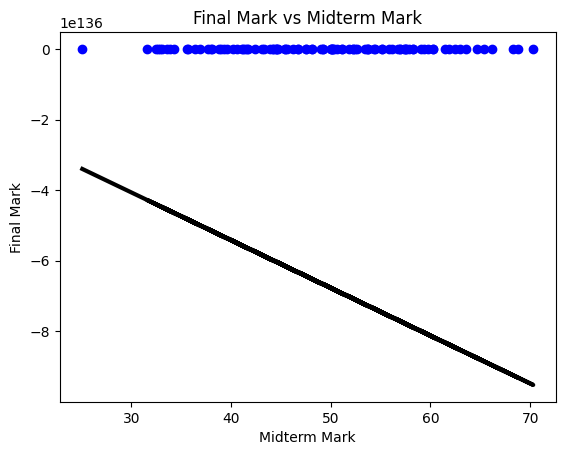

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['Midterm mark']), max(file_csv['Midterm mark'])).reshape(-1,1)
y= m_new*file_csv['Midterm mark']+b_new
# Plot
plt.scatter(file_csv['Midterm mark'], file_csv['Final mark'], color='blue')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.plot(file_csv['Midterm mark'], y, color='black', linewidth=3)
plt.title("Final Mark vs Midterm Mark")
plt.show()

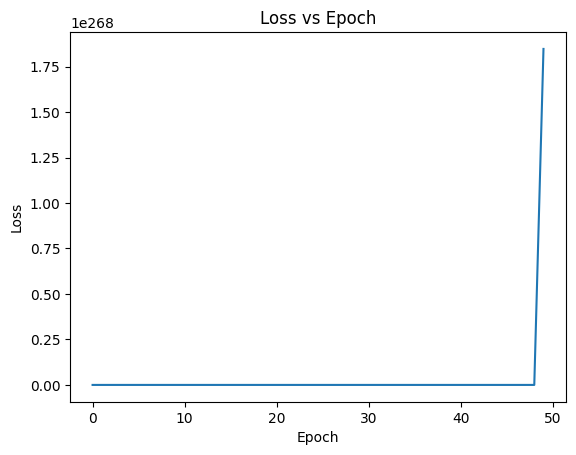

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(50), lossFunction)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

## Standardized

In [ ]:
m_old=m
b_old=b
lossFunction_std=[]
for i in range(100):
  m_new_std,b_new_std= update_weights(m_old, b_old,file_csv['standardized_final_mark'],'_std',file_csv['standardized_midterm_mark'])
  m_old=m_new_std
  b_old=b_new_std
  lossFunction_std.append(costFunction(file_csv['standardized_final_mark'],file_csv['final_mark_predicted_std']))
m_new_std,b_new_std

(0.7734781432351862, 2.58191905355698e-16)

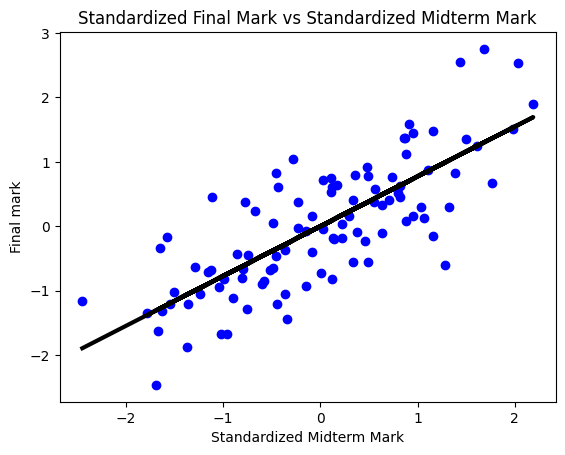

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['standardized_midterm_mark']), max(file_csv['standardized_midterm_mark'])).reshape(-1,1)

# Plot
plt.scatter(file_csv['standardized_midterm_mark'], file_csv['standardized_final_mark'], color='blue')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Final mark')
plt.plot(file_csv['standardized_midterm_mark'], file_csv['final_mark_predicted_std'], color='black', linewidth=3)
plt.title("Standardized Final Mark vs Standardized Midterm Mark")
plt.show()

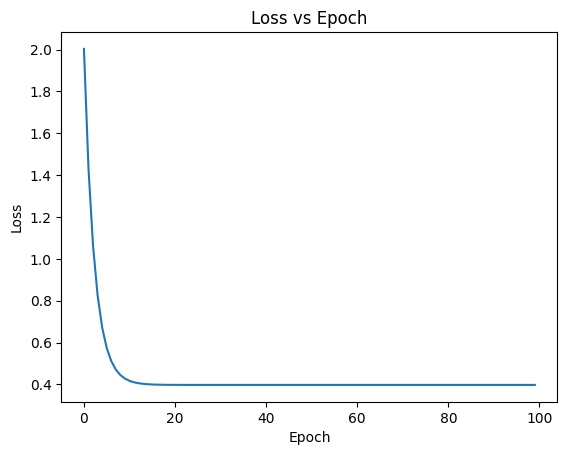

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(100), lossFunction_std)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

In [ ]:
m_old=m
b_old=b
lossFunction_std=[]
for i in range(2000):
  m_new_std,b_new_std= update_weights(m_old, b_old,file_csv['standardized_final_mark'],'_std',file_csv['standardized_midterm_mark'])
  m_old=m_new_std
  b_old=b_new_std
  lossFunction_std.append(costFunction(file_csv['standardized_final_mark'],file_csv['final_mark_predicted_std']))
m_new_std,b_new_std

(0.7734781435681738, 1.872417151882314e-16)

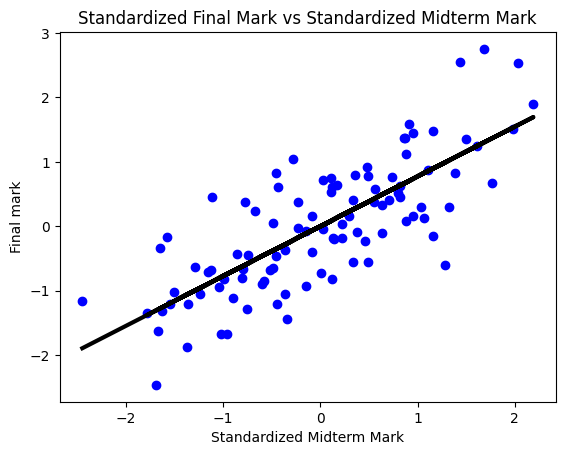

In [ ]:
# Create the prediction space
prediction_space = np.linspace(min(file_csv['standardized_midterm_mark']), max(file_csv['standardized_midterm_mark'])).reshape(-1,1)

# Plot
plt.scatter(file_csv['standardized_midterm_mark'], file_csv['standardized_final_mark'], color='blue')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Final mark')
plt.plot(file_csv['standardized_midterm_mark'], file_csv['final_mark_predicted_std'], color='black', linewidth=3)
plt.title("Standardized Final Mark vs Standardized Midterm Mark")
plt.show()

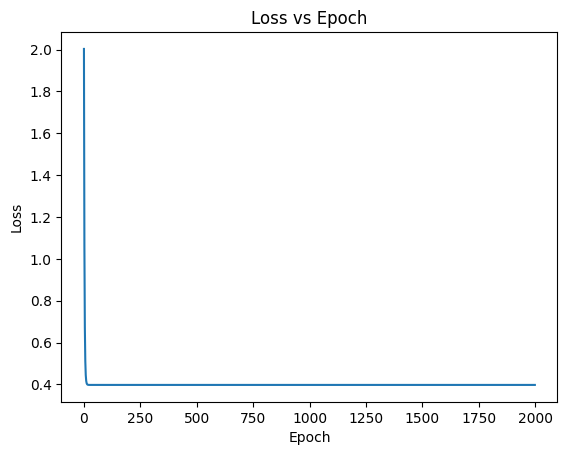

In [ ]:
# Plot Loss vs. Epoch
plt.plot(range(2000), lossFunction_std)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

#**Observation**
Increasing the learning rate to 0.1 resulted in large updates to the weights (m and b) during each epoch. This caused the model to overshoot the optimal values where the loss function is minimized, leading to instability.

Initially, the error plot remained at 0, likely because the weight updates oscillated around certain values without making significant progress. However, in the later epochs, the loss suddenly spiked upward, indicating that the model completely diverged. This happened because the large learning rate led to increasingly extreme weight updates, preventing proper convergence.

Due to this instability, I encountered an overflow error before reaching 100+ epochs. This suggests that the weight values became excessively large, surpassing the maximum representable number in the system, which led to numerical instability and crashed the training process.

With such an aggressive learning rate, the regression line became erratic, and instead of learning an optimal trend, the model failed to converge and crashed early. This highlights the importance of choosing an appropriate learning rate to ensure stable and effective training.

## **Q2:** Investigate the effect of standardization.



# **Observation**
Standardization helps by putting all features on a similar scale, making it easier for the model to learn without some values dominating the learning process. This makes training more stable and prevents the model from making extreme updates that could slow down or mess up learning.

In this case, the standardized data took longer to adjust, gradually moving toward the ideal regression line. On the other hand, the non-standardized data seemed to adapt faster, but that’s mainly because its original scale made the updates larger.

While standardization doesn’t completely remove the need to find a good learning rate, it makes the training process smoother and less sensitive to the initial learning rate choice. Since the values are now in a steady, smaller range, the model learns in a more controlled and consistent way rather than making erratic jumps.